In [1]:
## One Hot Encoding
from sklearn.preprocessing import LabelEncoder
## train test split
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/DSA4266_Tundra")

Mounted at /content/drive


In [3]:
df = pd.read_csv('merged_data.csv')

In [4]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [5]:
df['seq'] = df['sequence'].str[1:6]

In [6]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0,AGACC
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0,AGACC
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0,AGACC
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0,AGACC
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0,AGACC


In [7]:
df_le = df.copy()
holder = df_le["seq"].values.reshape(-1, 1)

label_encoder = LabelEncoder()

temp = pd.DataFrame(label_encoder.fit_transform(holder))

temp.columns = ["seq_le"]

df_le = df_le.join(temp)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
df_le = df_le.drop(["sequence", "seq"], axis=1)

In [9]:
df_le.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq_le
0,ENST00000000233,244,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0,4
1,ENST00000000233,244,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0,4
2,ENST00000000233,244,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0,4
3,ENST00000000233,244,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0,4
4,ENST00000000233,244,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0,4


In [20]:
from sklearn.model_selection import GroupShuffleSplit
group_split = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(group_split.split(df_le, groups=df['gene_id']))

train = df_le.iloc[train_idx]
test = df_le.iloc[test_idx]

In [21]:
len(train)

8711306

In [22]:
len(test)

2315800

In [23]:
len(train[train['label'] == 0])

8327361

In [24]:
len(train[train['label'] == 1])

383945

In [25]:
399415/8422269

0.0474236811956493

       transcript_position  -1_flank_length   -1_flank_std  -1_flank_mean  \
count        778829.000000    778829.000000  778829.000000  778829.000000   
mean           1338.901098         0.008231       4.509372     113.666620   
std            1126.616127         0.005477       2.606427      10.875389   
min               3.000000         0.001660       0.195000      75.300000   
25%             615.000000         0.004340       2.580000     107.000000   
50%            1071.000000         0.006740       3.760000     116.000000   
75%            1774.000000         0.010400       5.890000     121.000000   
max           18680.000000         0.114000     199.000000     148.000000   

       central_length    central_std   central_mean  +1_flank_length  \
count   778829.000000  778829.000000  778829.000000    778829.000000   
mean         0.008221       5.120832     112.929467         0.007191   
std          0.005368       2.883605      12.384940         0.004469   
min          0.001

<Axes: >

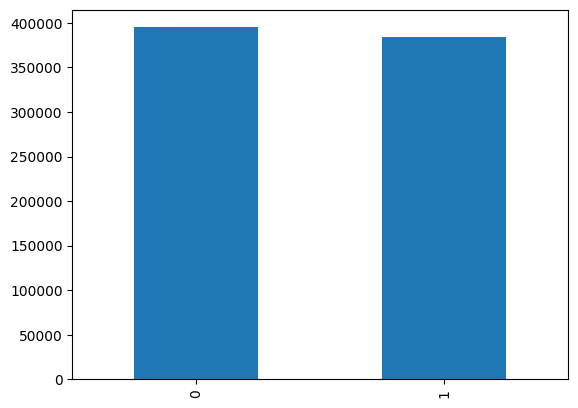

In [26]:
# Calculate the number of negative samples to remove (70% of total negatives)
num_negatives_to_remove = int(0.95258 * len(train[train['label'] == 0]))

# Get the indices of negative samples
negative_indices = train.index[train['label'] == 0]

# Randomly select and remove 70% of the negative samples
indices_to_remove = np.random.choice(negative_indices, size=num_negatives_to_remove, replace=False)
train = train.drop(indices_to_remove)

# Reset the index of the DataFrame (optional)
train.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(train.describe())
train['label'].value_counts().plot(kind='bar')

In [27]:
train.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq_le
0,ENST00000000233,244,0.00365,2.92,126.0,0.00698,3.70,126.0,0.00467,3.23,80.2,ENSG00000004059,0,4
1,ENST00000000233,244,0.00764,3.88,108.0,0.00930,11.90,124.0,0.00975,4.65,81.4,ENSG00000004059,0,4
2,ENST00000000233,244,0.00896,4.54,127.0,0.00232,11.60,121.0,0.00598,5.63,78.3,ENSG00000004059,0,4
3,ENST00000000233,244,0.00266,2.74,127.0,0.02000,6.55,125.0,0.00398,4.47,78.0,ENSG00000004059,0,4
4,ENST00000000233,244,0.00863,5.26,124.0,0.00764,15.70,124.0,0.00465,1.52,77.7,ENSG00000004059,0,4


In [28]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [29]:
# Columns to exclude from scaling
exclude_columns = ['transcript_id', 'gene_id',"label"]

# Columns to scale
columns_to_scale = [col for col in train.columns if col not in exclude_columns]

# Apply Min-Max scaling to the specified columns

train[columns_to_scale] = mm.fit_transform(train[columns_to_scale])
test[columns_to_scale] = mm.fit_transform(test[columns_to_scale])

<ipython-input-29-44eba1cdbf84>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[columns_to_scale] = mm.fit_transform(test[columns_to_scale])


In [30]:
train.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq_le
0,ENST00000000233,0.012904,0.017714,0.013707,0.697387,0.055800,0.027745,0.605263,0.035816,0.028727,0.229068,ENSG00000004059,0,0.235294
1,ENST00000000233,0.012904,0.053231,0.018536,0.449794,0.080134,0.094017,0.578947,0.096264,0.042279,0.248025,ENSG00000004059,0,0.235294
2,ENST00000000233,0.012904,0.064981,0.021856,0.711142,0.006923,0.091592,0.539474,0.051404,0.051632,0.199052,ENSG00000004059,0,0.235294
3,ENST00000000233,0.012904,0.008902,0.012801,0.711142,0.192364,0.050779,0.592105,0.027606,0.040561,0.194313,ENSG00000004059,0,0.235294
4,ENST00000000233,0.012904,0.062044,0.025477,0.669876,0.062723,0.124728,0.578947,0.035578,0.012407,0.189573,ENSG00000004059,0,0.235294


In [31]:
test.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,seq_le
14986,ENST00000005257,0.054772,0.047522,0.016327,0.541161,0.080241,0.073284,0.649369,0.091487,0.024050,0.365551,ENSG00000006451,0,1.0
14987,ENST00000005257,0.054772,0.014630,0.016594,0.487179,0.048482,0.037224,0.607293,0.200551,0.032748,0.371747,ENSG00000006451,0,1.0
14988,ENST00000005257,0.054772,0.024776,0.015126,0.514170,0.034106,0.056367,0.607293,0.105252,0.020668,0.355638,ENSG00000006451,0,1.0
14989,ENST00000005257,0.054772,0.070910,0.028070,0.500675,0.017236,0.045905,0.635344,0.084392,0.024395,0.351921,ENSG00000006451,0,1.0
14990,ENST00000005257,0.054772,0.049658,0.049020,0.527665,0.051269,0.079220,0.579243,0.091487,0.012315,0.324659,ENSG00000006451,0,1.0


In [32]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)